In [26]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [28]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/dh3553/projects/fairness-variance


# Visualizations

In [29]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set

## Initialize Configs

In [30]:
EXPERIMENT_NAME = 'one_repair_lvl_many_models_income_GA'
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Folktables_GA_2018_Income'
EXPERIMENT_SESSION_UUID = '114a1071-264b-49e6-b298-23db4031e9c2'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier']

In [31]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [32]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [33]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(864, 35)

In [34]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,0,OK,2023-07-26 23:28:05.161,...,0.768116,1.000000,0.000000,0.804167,1.000000,0.000000,0.756410,1.000000,0.000000,0.779333
1,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,1,OK,2023-07-26 23:28:05.173,...,0.803543,1.000000,0.000000,0.788889,1.000000,0.000000,0.811538,1.000000,0.000000,0.800667
2,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,2,OK,2023-07-26 23:28:05.183,...,0.744767,1.000000,0.000000,0.729167,1.000000,0.000000,0.755128,1.000000,0.000000,0.742667
3,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:28:05.194,...,0.754428,1.000000,0.000000,0.759722,1.000000,0.000000,0.756410,1.000000,0.000000,0.758000
4,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,0,OK,2023-07-26 23:18:00.701,...,0.797101,1.000000,0.000000,0.825000,1.000000,0.000000,0.782051,1.000000,0.000000,0.802667
5,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,1,OK,2023-07-26 23:18:00.713,...,0.801932,1.000000,0.000000,0.795833,1.000000,0.000000,0.808974,1.000000,0.000000,0.802667
6,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,2,OK,2023-07-26 23:18:00.724,...,0.743961,1.000000,0.000000,0.730556,1.000000,0.000000,0.753846,1.000000,0.000000,0.742667
7,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.735,...,0.768116,1.000000,0.000000,0.769444,1.000000,0.000000,0.765385,1.000000,0.000000,0.767333
192,Aleatoric_Uncertainty,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,0,OK,2023-07-26 23:28:05.161,...,0.584415,0.515162,0.813814,0.562546,0.504454,0.801094,0.601551,0.531585,0.818815,0.582829
193,Aleatoric_Uncertainty,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_GA_2018_Income,200,1,OK,2023-07-26 23:28:05.173,...,0.596542,0.539718,0.828960,0.583850,0.523684,0.808682,0.602983,0.547651,0.841250,0.593799


In [35]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [36]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
31,Accuracy,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.767311,1.000000,0.000000,0.766667,1.000000,0.000000,0.764103,1.000000,0.000000,0.765333
223,Aleatoric_Uncertainty,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.686853,0.639397,0.843343,0.695836,0.649245,0.848918,0.683815,0.632554,0.849858,0.689585
415,F1,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.645399,1.000000,0.000000,0.651452,1.000000,0.000000,0.640625,1.000000,0.000000,0.645875
607,FNR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.449791,0.000000,1.000000,0.437276,0.000000,1.000000,0.455150,0.000000,1.000000,0.446552
799,FPR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.096859,0.000000,1.000000,0.104308,0.000000,1.000000,0.098121,0.000000,1.000000,0.101087
991,IQR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.068461,0.063672,0.084254,0.069676,0.064618,0.086293,0.068313,0.063130,0.085102,0.068967
1183,Jitter,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.071760,0.051507,0.138545,0.073839,0.054351,0.137871,0.076796,0.053238,0.153101,0.075376
1375,Label_Stability,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.897866,0.927335,0.800692,0.893056,0.922192,0.797321,0.890321,0.924262,0.780380,0.891633
1567,Mean,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.657560,0.675311,0.599027,0.650197,0.668554,0.589884,0.656962,0.676786,0.592746,0.653715
1759,Overall_Uncertainty,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_GA_2018_Income,200,3,OK,2023-07-26 23:18:00.820,...,0.698637,0.650617,0.856987,0.707877,0.660604,0.863202,0.695541,0.643692,0.863487,0.701462


In [37]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [38]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.017874,0.006608,0.018418,RandomForestClassifier,Exp_iter_1,0.0,3
1,Equalized_Odds_FPR,0.006187,0.009010,0.024936,RandomForestClassifier,Exp_iter_1,0.0,3
2,Equalized_Odds_FNR,-0.017874,-0.006608,-0.018418,RandomForestClassifier,Exp_iter_1,0.0,3
3,Disparate_Impact,1.037949,0.999520,1.070751,RandomForestClassifier,Exp_iter_1,0.0,3
4,Statistical_Parity_Difference,0.026602,-0.000343,0.049881,RandomForestClassifier,Exp_iter_1,0.0,3
5,Accuracy_Parity,0.002564,-0.013615,-0.011497,RandomForestClassifier,Exp_iter_1,0.0,3
6,Label_Stability_Ratio,1.003072,0.963489,0.959639,RandomForestClassifier,Exp_iter_1,0.0,3
7,IQR_Parity,0.001362,0.002765,0.002942,RandomForestClassifier,Exp_iter_1,0.0,3
8,Std_Parity,0.001006,0.001744,0.001768,RandomForestClassifier,Exp_iter_1,0.0,3
9,Std_Ratio,1.020124,1.034927,1.035239,RandomForestClassifier,Exp_iter_1,0.0,3


In [40]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.013262,0.090499,0.027590,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.004707,0.005181,0.004611,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.013262,-0.090499,-0.027590,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.086494,1.281029,1.218302,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.061357,0.192583,0.156065,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [41]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [53]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 864x432 with 0 Axes>

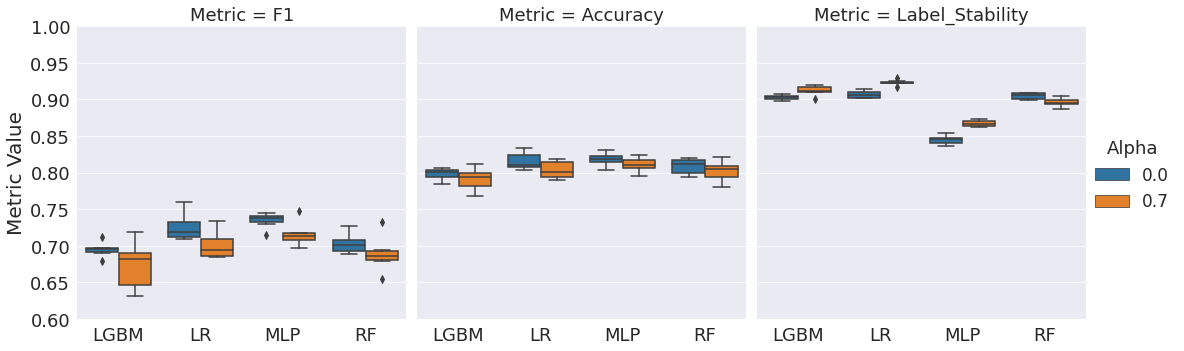

In [54]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 864x432 with 0 Axes>

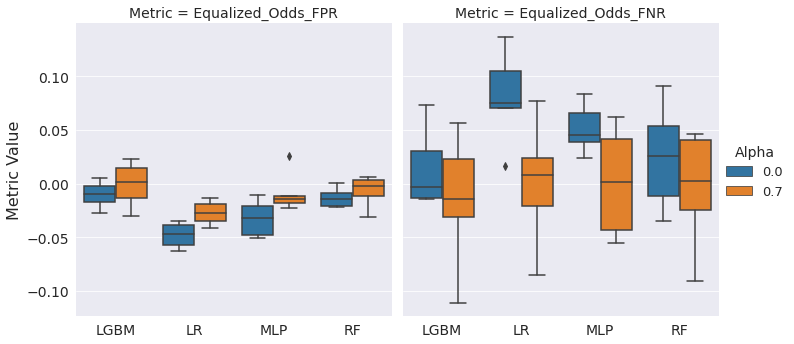

In [55]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [45]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'GA 2018',
    1: 'GA 2017',
    2: 'NY 2018',
    3: 'NY 2017',
}

<Figure size 864x432 with 0 Axes>

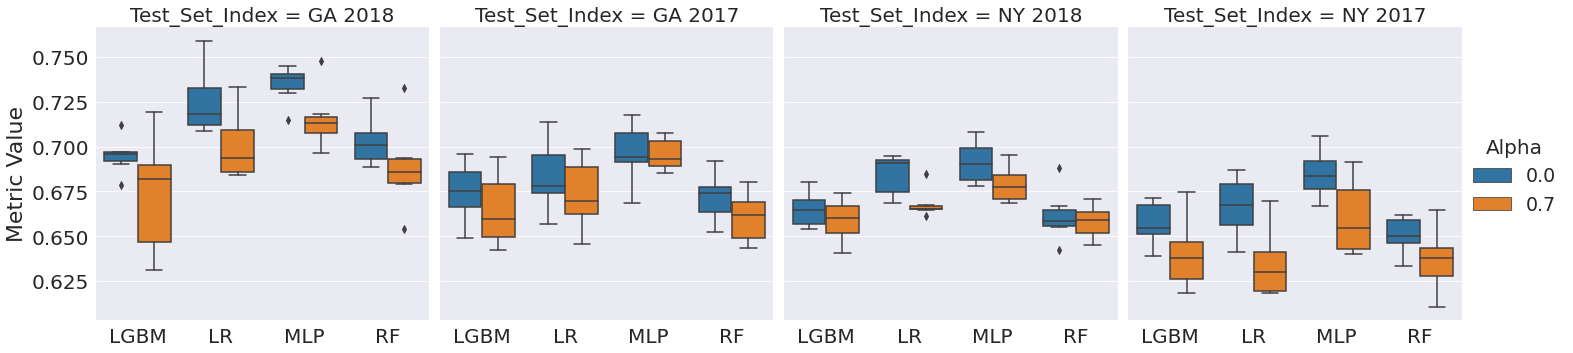

In [46]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

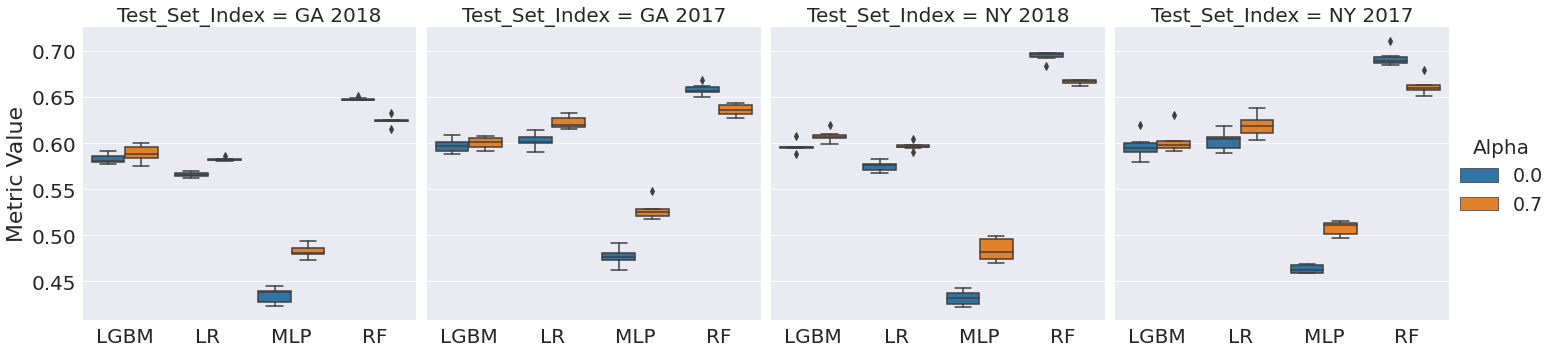

In [47]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

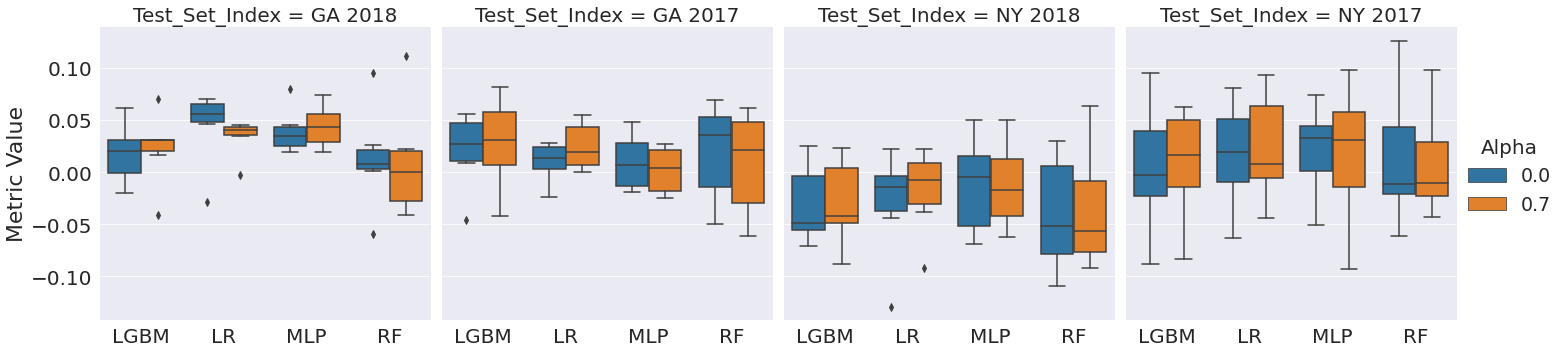

In [48]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

## Figure 3. Scatter plots.

In [49]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [50]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX&RAC1P',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [51]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='RAC1P',
                    fairness_metric_name='Equalized_Odds_FNR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)